In [157]:
import numpy as np
import matplotlib.pyplot as plt

data_dir = '../../data/diffraction_comparison/detector_1um/'
#data_dir = '../../data/diffraction_comparison/detector_bitran/'
#data_dir = '../../data/diffraction_comparison/detector_bitran4097/'

In [220]:
import math
intensity_sommerfeld = np.fromfile(data_dir + 'sommerfeld_focus.intensity')
intensity_fresnel = np.fromfile(data_dir + 'fresnel_diffraction_focus.intensity')
N = int(math.sqrt(intensity_sommerfeld.shape[0]))
intensity_sommerfeld = intensity_sommerfeld.reshape((N, N))
intensity_fresnel = intensity_fresnel.reshape((N, N))

intensity_sommerfeld /= np.sum(intensity_sommerfeld)
intensity_fresnel /= np.sum(intensity_fresnel)

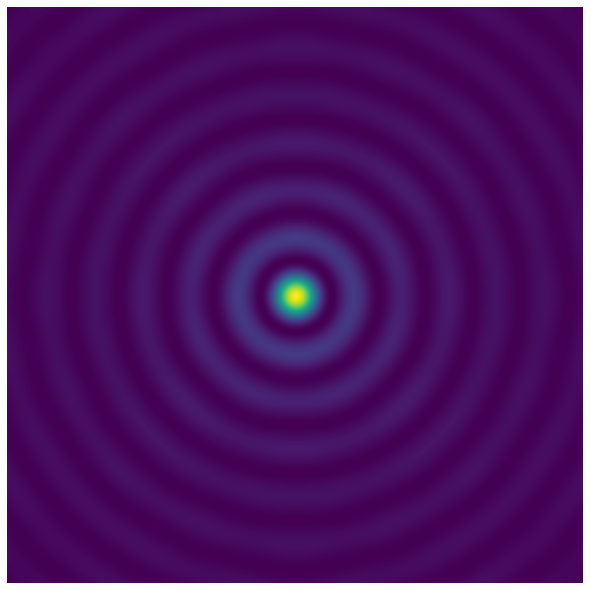

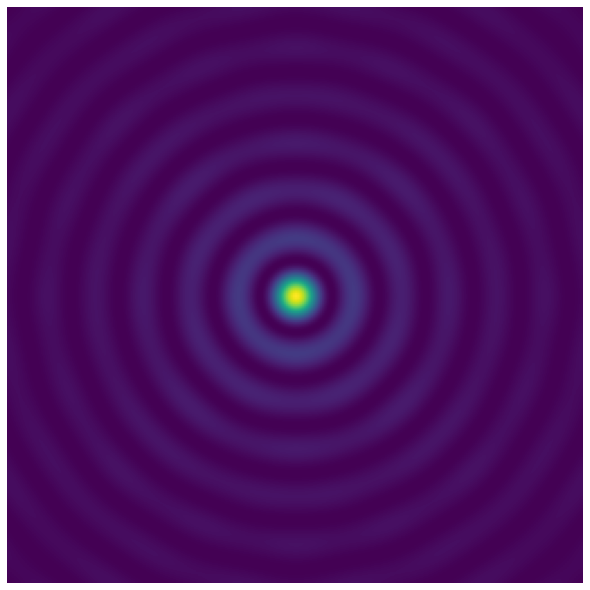

In [221]:
K = 256

plt.figure(figsize=(8, 8))
plt.axis('off')
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.imshow(intensity_sommerfeld[(N//2-K//2):(N//2+K//2), (N//2-K//2):(N//2+K//2)])

plt.figure(figsize=(8, 8))
plt.axis('off')
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.imshow(intensity_fresnel[(N//2-K//2):(N//2+K//2), (N//2-K//2):(N//2+K//2)])

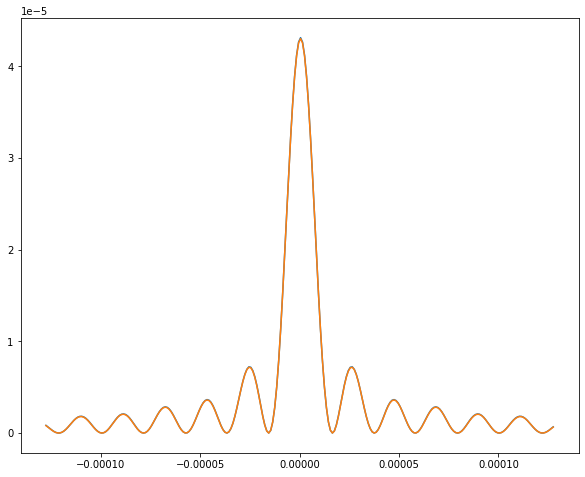

In [234]:
focus_pixel = 1.0e-6
focus_length = focus_pixel * N
x = np.linspace(-0.5 * focus_length, 0.5 * focus_length, N)

profile_sommerfeld = intensity_sommerfeld[N//2]
profile_fresnel = intensity_fresnel[N//2]

fig = plt.figure(figsize=(10, 8))
plt.plot(x[(N//2-K//2):(N//2+K//2)], profile_sommerfeld[(N//2-K//2):(N//2+K//2)])
plt.plot(x[(N//2-K//2):(N//2+K//2)], profile_fresnel[(N//2-K//2):(N//2+K//2)])
fig.savefig('../../thesis/chap2/figure/diffraction_comparison_profile.png')

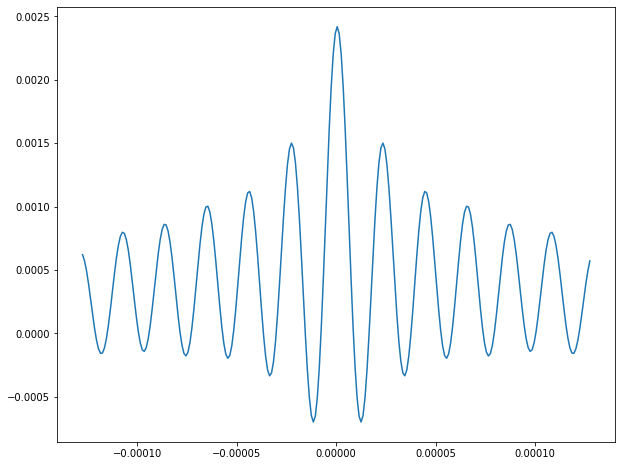

In [235]:
fig = plt.figure(figsize=(10, 8))
diff_normalized = (profile_sommerfeld - profile_fresnel) / np.max(profile_sommerfeld)
plt.plot(x[(N//2-K//2):(N//2+K//2)], diff_normalized[(N//2-K//2):(N//2+K//2)])
fig.savefig('../../thesis/chap2/figure/diffraction_comparison_normalized_diff.png')

In [233]:
np.max(np.abs(diff_normalized))

0.002418227309060414